In [1]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart (1).csv


Primeiras linhas do dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Tipos de dados:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
Resti

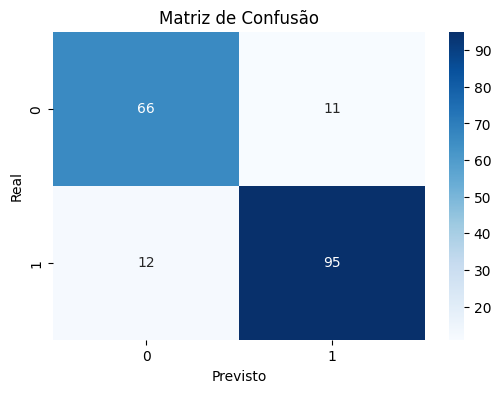

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report


df = pd.read_csv("heart.csv")


print("Primeiras linhas do dataset:")
print(df.head())


print("\nTipos de dados:")
print(df.dtypes)


df_encoded = pd.get_dummies(df, drop_first=True)


print("\nColunas após codificação:")
print(df_encoded.columns)


X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print(f"\nAcurácia: {acc:.2f}")
print(f"Precisão: {prec:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()
